<a href="https://colab.research.google.com/github/linukaratnayake/Intensity-Transformations-and-Neighborhood-Filtering/blob/main/Intensity_Transformations_and_Neighborhood_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-d729c84af928>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
  assert len(transform) is 256


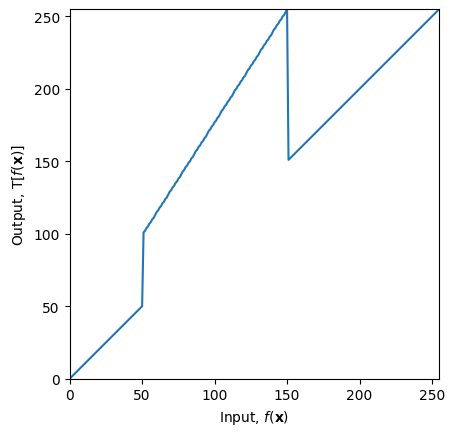

In [7]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

c = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t4 = np.linspace(c[2,1] - 1, c[3,1], c[3,0] - c[2,0]).astype('uint8')
t5 = np.linspace(c[3,1] + 1, 255, 255 - c[3,0]).astype('uint8')

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
transform = np.concatenate((transform, t4), axis=0).astype('uint8')
transform = np.concatenate((transform, t5), axis=0).astype('uint8')
assert len(transform) == 256

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

Text(0.5, 1.0, 'Transformed')

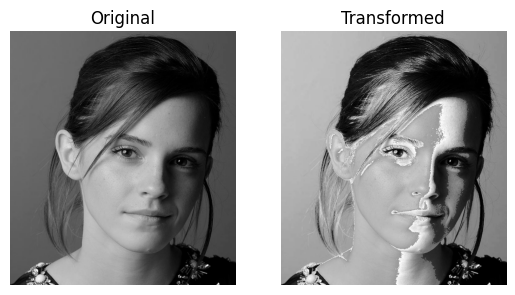

In [10]:
img_orig = cv.imread('/content/drive/My Drive/EN3160/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

image_transformed = cv.LUT(img_orig, transform)

# Display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].set_title('Original')
ax[1].imshow(cv.cvtColor(image_transformed, cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].set_title('Transformed')


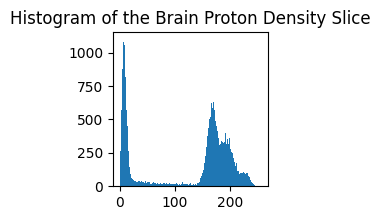

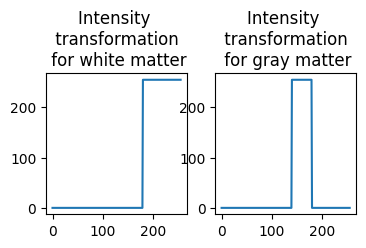

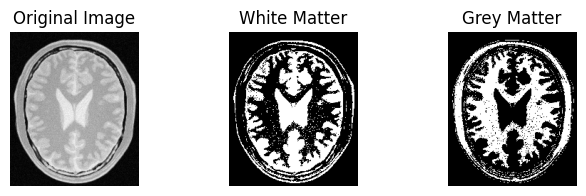

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('/content/drive/My Drive/EN3160/a1images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert image is not None
t1 = np.zeros(180)
t2 = 255 * np.ones(76)
t = np.concatenate((t1, t2), axis=0).astype(np.uint8)

s1 = np.zeros(140)
s2 = 255 * np.ones(40)
s3 = np.zeros(76)
s = np.concatenate((s1, s2, s3), axis=0).astype(np.uint8)

white_matter = cv.LUT(image, t)
gray_matter = cv.LUT(image, s)
plt.figure(figsize=(2, 2))
plt.hist(image.ravel(), 256, [0, 256])
plt.title("Histogram of the Brain Proton Density Slice")
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(4, 4))
ax[0].plot(t), ax[0].set_aspect('equal'), ax[0].set_title("Intensity \n transformation \n for white matter")
ax[1].plot(s), ax[1].set_aspect('equal'), ax[1].set_title("Intensity \n transformation \n for gray matter")
plt.show()

plt.figure(figsize=(8, 2)), plt.subplot(1, 3, 1), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(cv.cvtColor(white_matter, cv.COLOR_BGR2RGB)), plt.axis('off'), plt.title('White Matter')
plt.subplot(1, 3, 3), plt.imshow(cv.cvtColor(gray_matter, cv.COLOR_BGR2RGB)), plt.axis('off'), plt.title('Grey Matter')
plt.show()

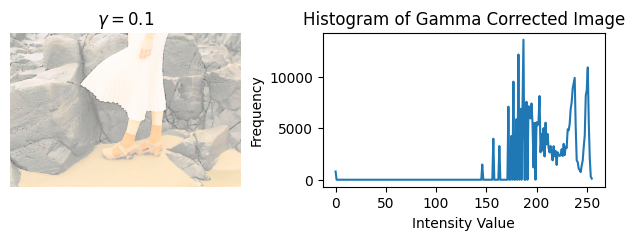

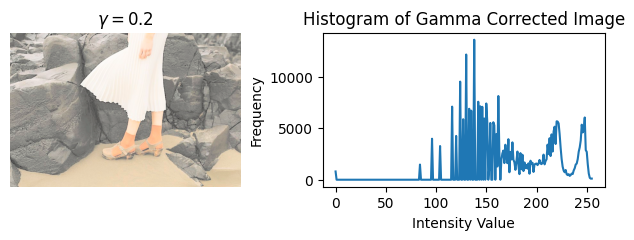

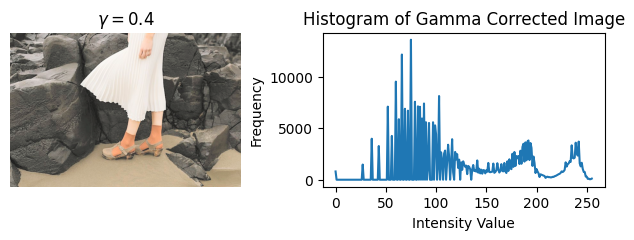

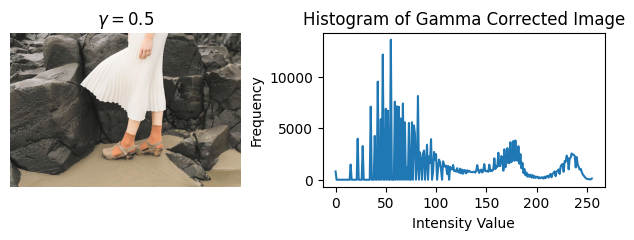

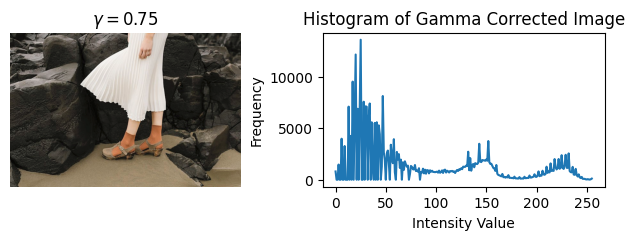

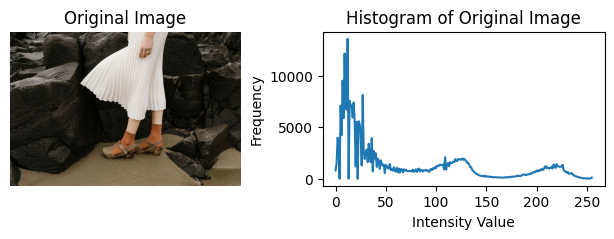

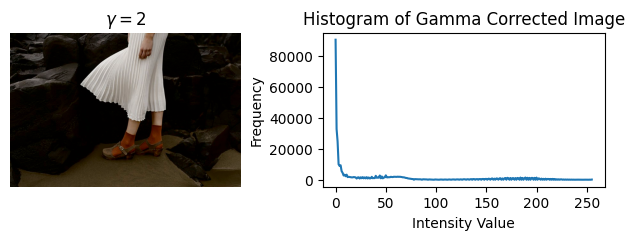

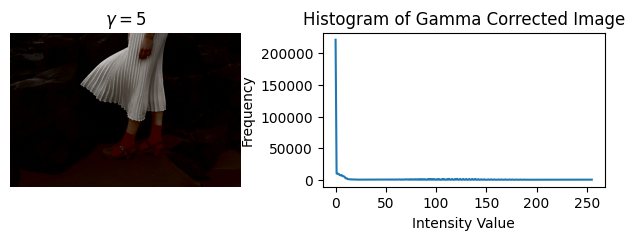

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma_values = [0.1, 0.2, 0.4, 0.5, 0.75, 1, 2, 5]
img = cv.imread('/content/drive/My Drive/EN3160/a1images/highlights_and_shadows.jpg')
L, a, b = cv.split(cv.cvtColor(img, cv.COLOR_BGR2LAB))

for i, gamma in enumerate(gamma_values):
    t = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    g = cv.LUT(L, t)
    corrected_img = cv.merge([g, a, b])

    hist = cv.calcHist([corrected_img], [0], None, [256], [0, 256])
    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    ax[0].imshow(cv.cvtColor(corrected_img,cv.COLOR_LAB2RGB))

    if gamma == 1:
      ax[0].set_title('Original Image')
    else:
      ax[0].set_title(f'$\gamma = {gamma}$')
    ax[0].axis('off')
    ax[1].plot(hist)

    if gamma==1:
      ax[1].set_title('Histogram of Original Image')
    else:
      ax[1].set_title('Histogram of Gamma Corrected Image')
    ax[1].set_xlabel('Intensity Value')
    ax[1].set_ylabel('Frequency')

    plt.show()

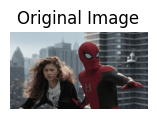

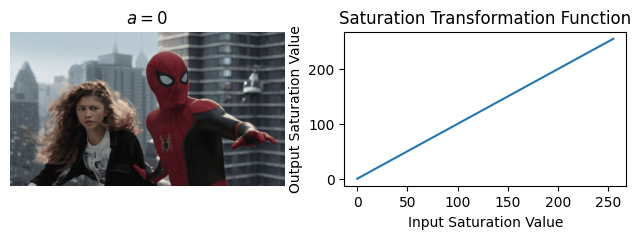

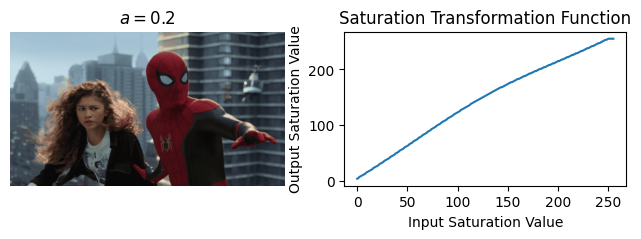

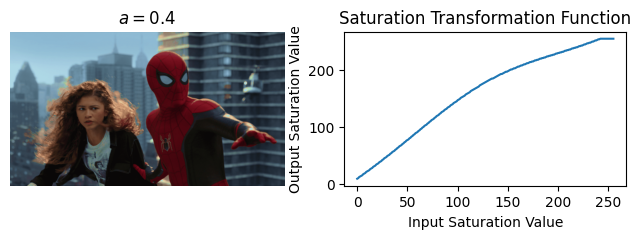

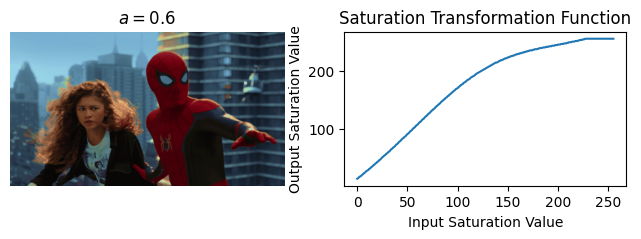

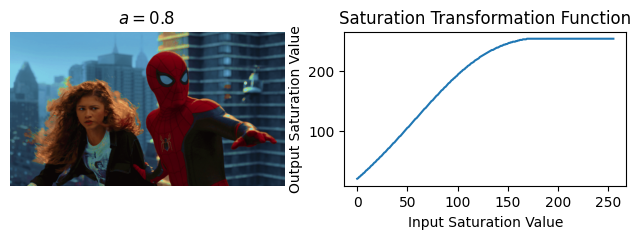

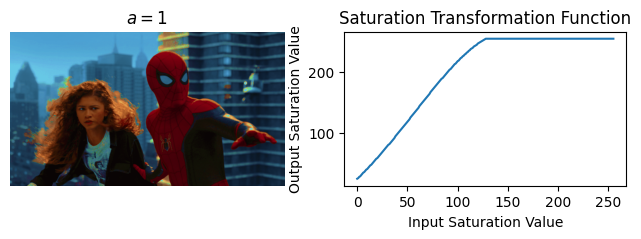

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/My Drive/EN3160/a1images/spider.png')
assert img is not None

plt.figure(figsize=(2, 1))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hue, sat, value= cv.split(img_hsv)

sigma = 70
a_values = [0, 0.2, 0.4, 0.6, 0.8, 1]

for a in a_values:
    sat_transformed = np.clip(sat + a * 128 * np.exp(-((sat - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    vibrant_img = cv.merge([hue, sat_transformed, value]); vibrant_img = cv.cvtColor(vibrant_img, cv.COLOR_HSV2BGR)

    fig, ax = plt.subplots(1, 2, figsize=(8, 2))
    ax[0].imshow(cv.cvtColor(vibrant_img, cv.COLOR_BGR2RGB))
    ax[0].set_title(f'$a = {a}$')
    ax[0].axis('off')

    x_values = np.arange(0, 256)
    y_values = np.clip(x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2)), 0, 255).astype(np.uint8)
    ax[1].plot(x_values, y_values)
    ax[1].set_title('Saturation Transformation Function')
    ax[1].set_xlabel('Input Saturation Value')
    ax[1].set_ylabel('Output Saturation Value')
    plt.show()